In [2]:
!pip install statsforecast

In [3]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.4 MB/s eta 0:00:00


In [1]:
# Clone Data Repository
!git clone https://github.com/ctanujit/Business_Forecasting

Cloning into 'Business_Forecasting'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 100 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 21.75 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Updating files: 100% (31/31), done.


In [2]:
# Changing working directory
%cd /content/Business_Forecasting/Workshop

/content/Business_Forecasting/Workshop


# Time series plot and decomposition

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [6]:
df = pd.read_csv('Decomposition.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [7]:
# Extracting year from date column
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


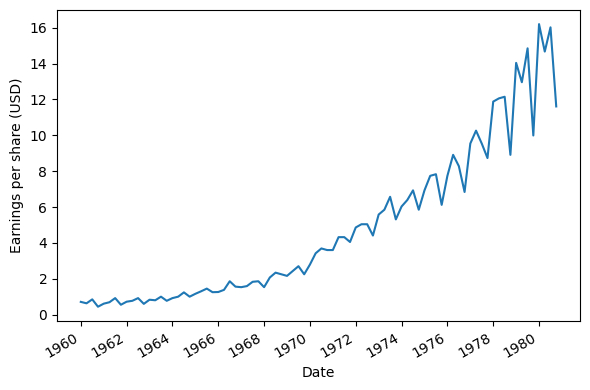

In [8]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [9]:
# Time series decomposition
advanced_decomposition = STL(df.data, period=4).fit()

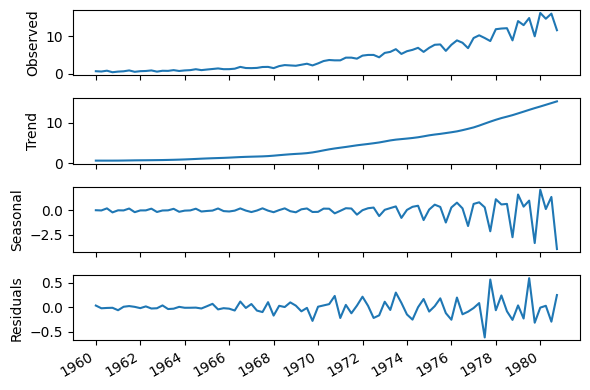

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

# Naive Forecasting Methods

In [11]:
df = pd.read_csv('Decomposition.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [12]:
# Split data into train and test
train = df[:-4]
test = df[-4:]

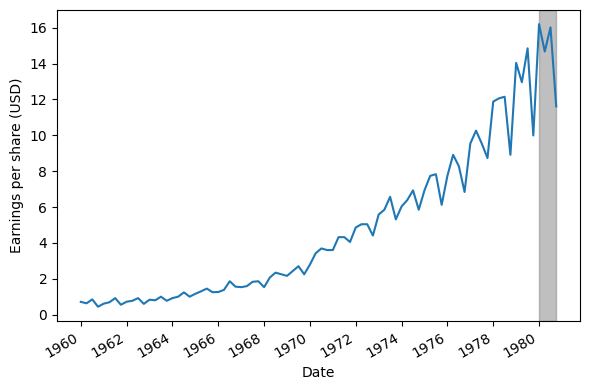

In [13]:
# Visualize train test data

fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=.5)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [14]:
# Forefcast performance metric

def metric(y_true, y_pred):
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
  mae = np.mean(np.abs(y_true - y_pred))
  return mape, rmse, mae

In [15]:
# Average forecast model

historical_mean = np.mean(train['data'])
historical_mean

np.float64(4.308499987499999)

In [16]:
test.loc[:, 'average_model'] = historical_mean
test

/tmp/ipython-input-3900186482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'average_model'] = historical_mean


,date,data,average_model
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [17]:
mape_hist_mean, rmse_hist_mean, mae_hist_mean = metric(test['data'], test['average_model'])
print(mape_hist_mean)

70.00752579965119


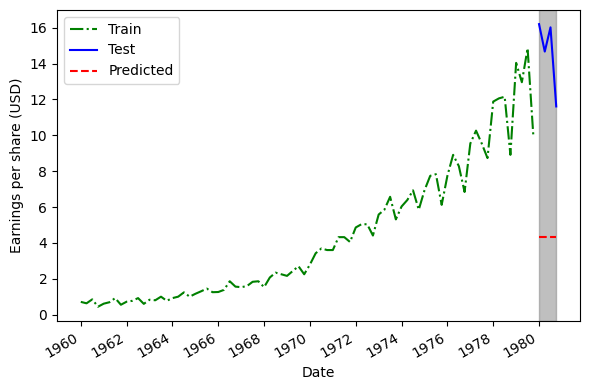

In [18]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['average_model'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.5)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [19]:
# Last year average model
last_year_mean = np.mean(train['data'][-4:])
test.loc[:, 'pred__last_yr_mean'] = last_year_mean
mape_last_year_mean, rmse_last_year_mean, mae_last_year_mean = metric(test['data'], test['pred__last_yr_mean'])
print(mape_last_year_mean)

15.5963680725103


/tmp/ipython-input-428486451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


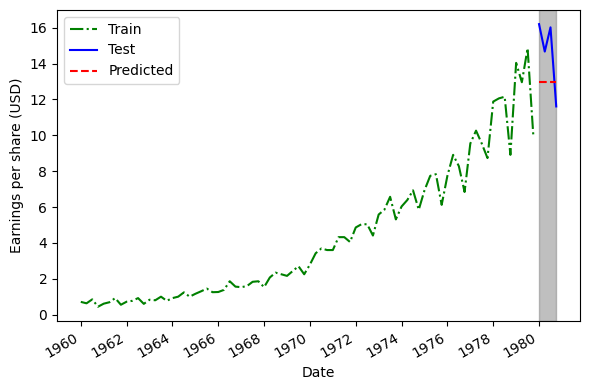

In [20]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.5)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [21]:
# Naive model
last = train['data'].iloc[-1]
test.loc[:, 'pred_last'] = last
mape_last, rmse_last, mae_last = metric(test['data'], test['pred_last'])
print(mape_last)

30.457277908606535


/tmp/ipython-input-899932982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


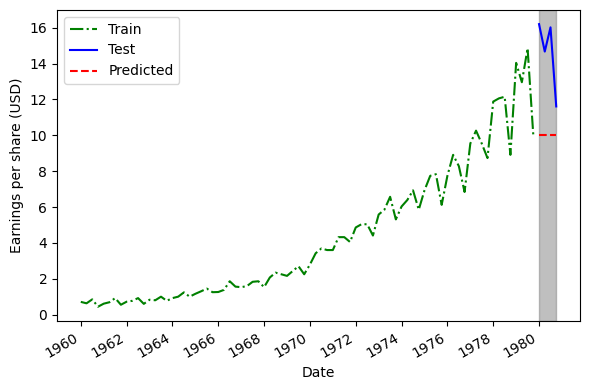

In [22]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.5)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [23]:
# Naive seasonal model
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
mape_naive_seasonal, rmse_naive_seasonal, mae_naive_seasonal = metric(test['data'], test['pred_last_season'])
print(mape_naive_seasonal)

11.561658552433654


/tmp/ipython-input-2692128456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


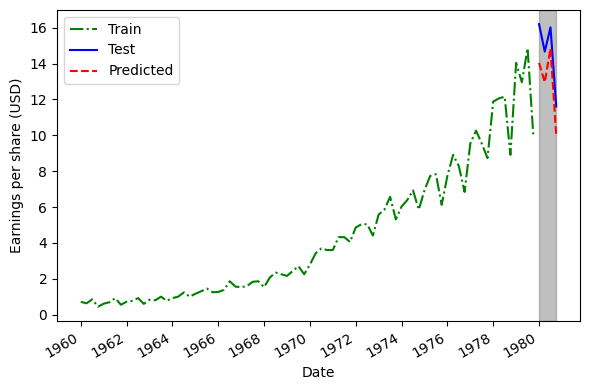

In [24]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.5)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

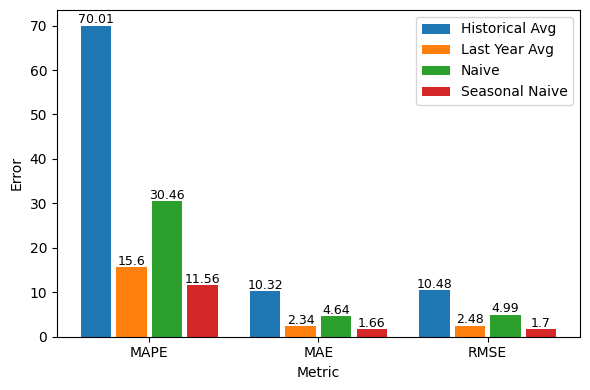

In [25]:
fig, ax = plt.subplots()

metrics = ['MAPE', 'MAE', 'RMSE']
baselines = ['Historical Avg', 'Last Year Avg', 'Naive', 'Seasonal Naive']

x = np.arange(len(metrics))
width = 0.18
gap = 0.03

values = {
    'Historical Avg': [mape_hist_mean, mae_hist_mean, rmse_hist_mean],
    'Last Year Avg': [mape_last_year_mean, mae_last_year_mean, rmse_last_year_mean],
    'Naive': [mape_last, mae_last, rmse_last],
    'Seasonal Naive': [mape_naive_seasonal, mae_naive_seasonal, rmse_naive_seasonal]
}

for i, (baseline, vals) in enumerate(values.items()):
    ax.bar(
        x + i * (width + gap),
        [round(v, 2) for v in vals],
        width,
        label=baseline
    )

ax.set_xlabel('Metric')
ax.set_ylabel('Error')
ax.set_xticks(x + 1.5 * (width + gap))
ax.set_xticklabels(metrics)
ax.legend()

# value labels
for i, (baseline, vals) in enumerate(values.items()):
    for j, v in enumerate(vals):
        ax.text(
            x[j] + i * (width + gap),
            round(v, 2) + 0.5,
            round(v, 2),
            ha='center',
            fontsize=9
        )

plt.tight_layout()
plt.show()

## Exercise

Forecast the close price of SPY data using the naive methods and compute the corresponding MAPE, RMSE, and MAE values.

# Auto Regressive Models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [1]:
df = pd.read_csv("Esperanza_vida.csv")
df.columns=["ds", "y"]
df["unique_id"]="1" # Unique_id is required for stateforecast package
df.head()

NameError: name 'pd' is not defined

In [ ]:
print(df.dtypes)

In [ ]:
# COnvert date to datetime object
df["ds"] = pd.to_datetime(df["ds"])

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

In [ ]:
# Train test data split
Y_train_df = df[df.ds<='2013-01-01']
Y_test_df = df[df.ds>'2013-01-01']

Y_train_df.shape, Y_test_df.shape

In [ ]:
# Stationarity Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(Y_train_df["y"])
p_value = result[1]
print(f"ADF p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The series is stationary (reject H₀).")
else:
    print("The series is non-stationary (fail to reject H₀).")

In [ ]:
# 1st order Differncing

df1=Y_train_df.copy()
df1['y_diff'] = Y_train_df['y'].diff()
df1.dropna(inplace=True)
df1.head()

In [ ]:
# Stationarity Test of differenced series

result = adfuller(df1['y_diff'])
p_value = result[1]
print(f"ADF p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The first-order differenced series is stationary (reject H₀).")
else:
    print("The first-order differenced series is non-stationary (fail to reject H₀).")

In [ ]:
# Visualization of original series, 1st-order differenced series, along with the ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)
plot_pacf(df1["y"], ax=axes[0, 2],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)
plot_pacf(df1["y"].diff().dropna(), ax=axes[1, 2],lags=20)
plt.show()

In [ ]:
# Fitting AR(1) model
from statsforecast.models import ARIMA
sf_ar = StatsForecast(models=[ARIMA(order=(1, 0, 0))], freq='YS')
sf_ar.fit(Y_train_df)
y_hat_ar = sf_ar.forecast(df=Y_train_df, h=len(Y_test_df))
y_hat_ar

In [ ]:
# Fitting ARIMA(1, 1, 1) model

sf_arima = StatsForecast(models=[ARIMA(order=(1, 1, 1))], freq='YS') # p, d, q selected based on ADF test, PACF, ACF plot
sf_arima.fit(Y_train_df)
y_hat_arima = sf_arima.forecast(df=Y_train_df, h=len(Y_test_df))
y_hat_arima

In [ ]:
# y_hat_ar has predictions from AR model
df_eval = Y_test_df.merge(y_hat_arima.rename(columns={"ARIMA":"y_hat_arima"}), on=["unique_id", "ds"])
df_eval = df_eval.merge(y_hat_ar.rename(columns={"ARIMA":"y_hat_ar"}), on=["unique_id", "ds"])

# ARIMA metrics
mape, rmse, mae = metric(df_eval["y"], df_eval["y_hat_arima"])
print("ARIMA -> MAPE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}".format(mape, rmse, mae))

# AR metrics
mape, rmse, mae = metric(df_eval["y"], df_eval["y_hat_ar"])
print("AR -> MAPE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}".format(mape, rmse, mae))


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df["ds"], df["y"], label="Actual", color="black", linewidth=2)
plt.plot(df_eval["ds"], df_eval["y_hat_arima"], label="ARIMA Forecast", color="blue", linestyle='--')
plt.plot(df_eval["ds"], df_eval["y_hat_ar"], label="AR Forecast", color="red", linestyle=':')

plt.xlabel("Date")
plt.ylabel("y")
plt.title("Forecast vs Actual Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Auto ARIMA

In [ ]:
import scipy.stats as stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
df = pd.read_csv("candy_production.csv")
df.head()

In [ ]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

In [ ]:
df["ds"] = pd.to_datetime(df["ds"])
print(df.dtypes)

In [ ]:
StatsForecast.plot(df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model="additive", period=12)
fig = a.plot()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 6)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

In [ ]:
Y_train_df = df[df.ds<='2016-08-01']
Y_test_df = df[df.ds>'2016-08-01']
Y_train_df.shape, Y_test_df.shape

In [ ]:
plt.figure(figsize=(10, 6))  # ← increase width and height

sns.lineplot(data=Y_train_df, x="ds", y="y", label="Train")
sns.lineplot(data=Y_test_df, x="ds", y="y", label="Test")

plt.xlabel("Date")
plt.ylabel("y")
plt.title("Train & Test Visualization")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# FItting AutoARIMA model
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [ ]:
season_length = 12 # Monthly data
horizon = len(Y_test_df) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [ ]:
sf = StatsForecast(models=models, freq='MS')

In [ ]:
sf.fit(df=Y_train_df)

In [ ]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])

In [ ]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 10)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

In [ ]:
Y_hat_df = sf.forecast(df=Y_train_df, h=horizon, fitted=True)
Y_hat_df.head()

In [ ]:
# Interval Forecast
forecast_df = sf.forecast(df=Y_train_df, h=horizon, level = [80, 95])
forecast_df

In [ ]:
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize = (14, 6))
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA']].plot(ax=ax, linewidth=2)
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Monthly ', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [ ]:
crossvalidation_df = sf.cross_validation(df=Y_train_df,
                                         h=12,
                                         step_size=12,
                                         n_windows=5)

In [ ]:
crossvalidation_df.head()

In [ ]:
from functools import partial
import utilsforecast.losses as ufl
from utilsforecast.evaluation import evaluate

evaluate(
    Y_test_df.merge(Y_hat_df),
    metrics=[ufl.mae, ufl.mape, partial(ufl.mase, seasonality=season_length), ufl.rmse, ufl.smape],
    train_df=Y_train_df,
)

# Neural network for time series forecasting


In [ ]:
# deep imports
import tensorflow as tf

# the evaluation
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
from tensorflow.keras.layers import Dense, Input  # to create layer
from tensorflow.keras.models import Model  # whole model
tf.random.set_seed(42)

In [ ]:
passengers = pd.read_csv("airline_passengers.csv", parse_dates=True, index_col=0)

In [ ]:
passengers.head()

In [ ]:
passengers.plot()
plt.title("Passengers data");

We will perform the following
1. Create a **one-step** model
2. Create a **multi-step** / incremental model
3. Create a **multi-output** / MTR model

In [ ]:
# Differenceing
passengers["diffPassengers"] = passengers["Passengers"].diff()

In [ ]:
passengers.head()

## One step model

In [ ]:
lag = 12
train_idx = passengers.iloc[:-lag].index
test_idx = passengers.iloc[-lag:].index

In [ ]:
np_data = passengers.loc[:, "diffPassengers"].dropna().values
X = []
Y = []

for i in range(0, np_data.shape[0] - lag):
    x = np_data[i : i + lag]
    y = np_data[i + lag]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [ ]:
Xtr, Xte = X[:-lag], X[-lag:]
ytr, yte = Y[:-lag], Y[-lag:]

We will create a NN with:
- 12 input nodes
- 32 1st layer nodes
- 16 2nd layer nodes
- output layer to genenrate one step ahead forecast

In [ ]:
# model creation
input_layer = Input(shape=(Xtr.shape[1],)) # input layer
h1 = Dense(32, activation="relu")(input_layer) # first hidden layer
h2 = Dense(16, activation="relu")(h1) # second hiddden layer
output_layer = Dense(1, activation=None)(h2) #  Output layer
model = Model(input_layer, output_layer) # Stacking in single pack = Model

In [ ]:
model.summary()

In [ ]:
# model compile
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mape"])

In [ ]:
# model trainig
result = model.fit(Xtr, ytr,
         epochs=100,
         validation_data=(Xte, yte), verbose=1)

In [ ]:
# loss for validation and training
plt.plot(result.history['loss'], label="Train loss")
plt.plot(result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

In [ ]:
# Predict and plot the results
pred_tr = model.predict(Xtr).flatten()
pred_te = model.predict(Xte).flatten()

In [ ]:
passengers.loc[train_idx[lag+1:], "OneStep Diff Train Prediction"] = pred_tr
passengers.loc[test_idx, "OneStep Diff Test Prediction"] = pred_te

In [ ]:
passengers[["diffPassengers",
            "OneStep Diff Train Prediction",
            "OneStep Diff Test Prediction"]].plot()
plt.title("One step model differenced prediction (for train & test)");

In [ ]:
def evaluate_results(true, pred):
    print("RMSE: ", round(root_mean_squared_error(true, pred), 3))
    print("MAPE:", round(mean_absolute_percentage_error(true, pred), 3), "%")

In [ ]:
prev = passengers["Passengers"].shift(1) # reverse differencing the forecast
passengers.loc[train_idx[lag+1:], "OneStep Orig Train Pred"] = prev[train_idx[lag+1:]] + pred_tr
passengers.loc[test_idx, "OneStep Orig Test Pred"] = prev[test_idx] + pred_te

In [ ]:
passengers[["Passengers", "OneStep Orig Train Pred", "OneStep Orig Test Pred"]].plot()
plt.title("One step model prediction (for train & test)");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "OneStep Orig Test Pred"])

## Multi step model

Since the model is **already trained** we don't need to train it once again. We will just **change the way we forecast**.

In [ ]:
# Predict and plot the results

last_xte = Xte[0].reshape(1, -1)
multi_step_pred = []
for i in range(yte.shape[0]):
    pred = model.predict(last_xte)[0]
    last_xte = np.roll(last_xte, -1)
    last_xte[-1][-1] = pred

    multi_step_pred.append(pred)

In [ ]:
passengers.loc[test_idx, "MultiStep Test Prediction"] = multi_step_pred

In [ ]:
passengers[["diffPassengers", "MultiStep Test Prediction"]].plot()
plt.title("Multi step model differenced prediction test");

In [ ]:
# Reverse differencing
last_train = passengers.loc[train_idx[-1], "Passengers"]
passengers.loc[test_idx, "MultiStep Orig Test Pred"] = last_train + np.cumsum(multi_step_pred)

In [ ]:
passengers[["Passengers", "OneStep Orig Test Pred", "MultiStep Orig Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiStep Orig Test Pred"])

## Multi output model

Here, we will need to create different training and testing data... and will need to re-train the model from scratch. Not only that, the model's **structure** will change as well.

In [ ]:
# for this we will have to construct another dataset
lag = 12
h = 12
X, y = [], []
for offset in range(len(np_data) - lag - h + 1):
    X.append(np_data[offset : offset+lag])
    y.append(np_data[offset+lag : offset+lag+h])

X = np.array(X)
y = np.array(y)

In [ ]:
Xtr_m, ytr_m = X[:-1], y[:-1]
Xte_m, yte_m = X[[-1]], y[[-1]]

In [ ]:
#  Model creation
input_layer = Input(shape=(Xtr_m.shape[1], ))
h1 = Dense(32, activation="relu")(input_layer)
h1 = Dense(32, activation="relu")(h1)
output_layer = Dense(ytr_m.shape[1])(h1)
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

In [ ]:
# compile
model.compile(optimizer="adam", loss="mse")

In [ ]:
# fit
mtr_result = model.fit(Xtr_m, ytr_m,
                       epochs=100,
                       validation_data=(Xte_m, yte_m))

In [ ]:
plt.plot(mtr_result.history['loss'], label="Train loss")
plt.plot(mtr_result.history['val_loss'], label="Validation loss")
plt.xlabel("← Epoch →", labelpad=20)
plt.ylabel("← MSE →", labelpad=20)
plt.title("Model performance during training")
plt.legend();

In [ ]:
mtr_test_pred = model.predict(Xte_m)

In [ ]:
# Reverse Differencing
passengers.loc[test_idx, "MultiOutput Orig Test Pred"] = last_train + np.cumsum(mtr_test_pred)

In [ ]:
passengers[["Passengers", "OneStep Orig Test Pred", "MultiStep Orig Test Pred", "MultiOutput Orig Test Pred"]].plot()
plt.title("Multistep model prediction for test");

In [ ]:
evaluate_results(passengers.loc[test_idx, "Passengers"], passengers.loc[test_idx, "MultiOutput Orig Test Pred"])

Which model is performing best based on RMSE and MAPE?

# RNN for Time Series Forecasting

In [ ]:
import warnings

from darts.dataprocessing.transformers import Scaler
from darts.datasets import SunspotsDataset
from darts import TimeSeries
from darts.metrics import mape
from darts.models import BlockRNNModel, RNNModel
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import logging
warnings.filterwarnings('ignore')

In [ ]:
series_sunspot = SunspotsDataset().load()
series_sunspot.plot()

In [ ]:
check_seasonality(series_sunspot, max_lag= 240)

In [ ]:
plot_acf(series_sunspot, 125, max_lag = 240)

In [ ]:
# Train test split
train_sp, val_sp = series_sunspot.split_after(pd.Timestamp("19401001"))

In [ ]:
# Scaling
transformer_sp = Scaler()
train_sp_transformed = transformer_sp.fit_transform(train_sp)
val_sp_transformed = transformer_sp.transform(val_sp)
sseries_sp_transformed = transformer_sp.transform(series_sunspot)

In [ ]:
model_sp = BlockRNNModel(model = 'RNN', input_chunk_length = 125,
                         output_chunk_length = 36, hidden_dim = 10, n_rnn_layers = 1,
                         batch_size = 32, n_epochs = 100, dropout = 0.1,
                         model_name = 'Sunspot_RNN', nr_epochs_val_period = 1,
                         optimizer_kwargs = {'lr': 1e-3}, log_tensorboard = True,
                         random_state = 42)

In [ ]:
model_sp.fit(train_sp_transformed, val_series= val_sp_transformed, verbose = True)

In [ ]:
pred_series = model_sp.historical_forecasts(sseries_sp_transformed,
                                           start = pd.Timestamp("19401001"),
                                           forecast_horizon = 36, stride = 10,
                                           retrain = False, verbose =True,
                                          last_points_only = True)

In [ ]:
from darts.models import ARIMA

pred_arima_sp = ARIMA(
    p=1, d=1, q=1  # change order if needed
).historical_forecasts(
    sseries_sp_transformed,
    start=pd.Timestamp("19401001"),
    forecast_horizon=36,
    retrain=True,
    verbose=True,
    stride=10,
    last_points_only=True
)

In [ ]:
val_sp_transformed.plot(label = 'actual')
pred_series.plot(label = 'RNN prediction')
pred_arima_sp.plot(label = 'ARIMA prediction')
plt.legend()
plt.show()

In [ ]:
# Performance of RNN model and ARIMA model

print("RNN model performance is ", round(mape(pred_series, val_sp_transformed), 3))
print("ARIMA model performance is ", round(mape(pred_arima_sp, val_sp_transformed), 3))
